In [3]:
import spacy
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

In [31]:
# Read the data
data = pd.read_csv('archive/twcs/twcs.csv',sep=',',encoding = 'latin1')
data.head(30)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


1. Definition of the Dataset (5 Points)
- Comprehensive and clear definition: 5 points
- Partially clear definition: 3 points
- Vague or incomplete definition: 1 point

In [36]:
data.replace({'inbound': 'false'}, {'inbound': 'False'})

print(data['inbound'].unique())


data_filtered = data.loc[(data['author_id'].isin(['115712','115788','119238'])),:].groupby('author_id').apply(lambda x: x.sort_values(by='created_at', ascending=False))

[False  True]


C:\Users\Luiz\AppData\Local\Temp\ipykernel_2676\2297810264.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_filtered = data.loc[(data['author_id'].isin(['115712','115788','119238'])),:].groupby('author_id').apply(lambda x: x.sort_values(by='created_at', ascending=False))


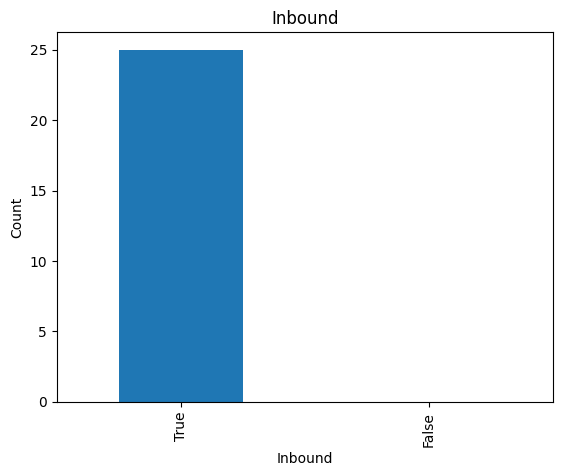

In [37]:
# graph for inbound field
df_inbound = data_filtered["inbound"].value_counts().to_frame()
df_inbound.loc["False"] = 0
df_inbound.plot(kind="bar", title="Inbound", legend=False)
plt.xlabel("Inbound")
plt.ylabel("Count")
plt.show()

The answer will be...
True appears 1537843 times in the inbound field
False appears 1273931 times in the inbound field


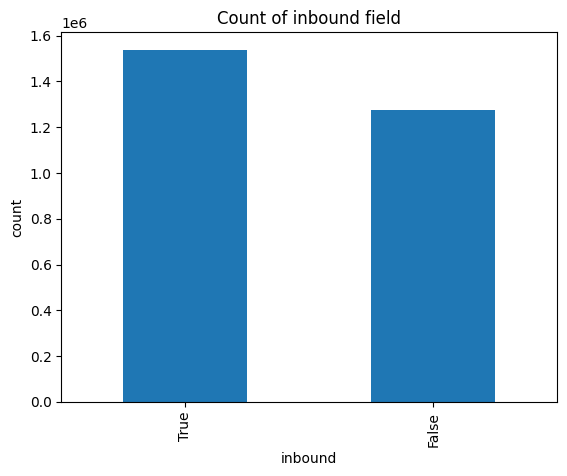

In [46]:
# count the time of label in the field
inbound_counts = data['inbound'][data['inbound'].isin([True, False])].value_counts()

print("The answer will be...")
print("True appears {} times in the inbound field".format(inbound_counts[True]))
print("False appears {} times in the inbound field".format(inbound_counts[False]))

import matplotlib.pyplot as plt

inbound_counts.plot(kind='bar')
plt.title('Count of inbound field')
plt.xlabel('inbound')
plt.ylabel('count')
plt.show()


In [ ]:
data.iloc[0]['text']

2. Visualization of the Dataset Features and Results (15 Points)
- Detailed and insightful visualizations: 15 points
- Basic visualizations with some insights: 10 points
- Minimal effort in visualization: 5 points

# Basic Visualizations

Inbound / outbound volume

time of response minimum and maximum 

# Reference for visualization https://www.kaggle.com/code/sardiirfansyah/nlp-eda-ner-glove-lstm-gru-cnn-tflite

response-to-satisfaction analysis, word clouds, sentiment trends, topic evolution, and hourly heatmaps.

response-to-satisfaction analysis

word clouds
sentiment trends
topic evolution
hourly heatmaps

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(' '.join(data['text']))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

3. Cleaning the Text Document with Two Approaches

- Effective use of two distinct cleaning approaches, with clear explanations: 20 points
- Use of two approaches, but with limited explanation or effectiveness: 15 points
- Use of one approach or ineffective cleaning methods: 10 points

In [ ]:
# Pipeline

4. Implementation of Three Word Embedding Methods (30 Points)
- Comprehensive and effective implementation of three methods, including one with SpaCy: 30 points
- Implementation of three methods, but with minor issues or lack of depth: 20 points
- Implementation of less than three methods or major issues in implementation: 10 points

5. Comparison of the Results of Word Embedding Methods (10 Points)
- In-depth and insightful comparison, with clear findings: 10 points
- Basic comparison with some insights: 7 points
- Superficial comparison or missing key aspects: 5 points

6. Report and Description of Work Done (20 Points)
- Comprehensive and well-structured report, clearly describing all aspects of the project: 20 points
- Adequately detailed report with minor omissions or structural issues: 15 points
- Poorly structured report with significant omissions: 10 points